mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 2.402199999988079 seconds
All requested packages already installed.
--- RISK ASSESSMENT REPORT (Nairobi Ops) ---
If we cut inventory by 0%: Risk of Failure is 0.1% -> Cash Unlocked: $0
If we cut inventory by 10%: Risk of Failure is 0.4% -> Cash Unlocked: $1,000,000
If we cut inventory by 20%: Risk of Failure is 1.1% -> Cash Unlocked: $2,000,000
If we cut inventory by 30%: Risk of Failure is 3.4% -> Cash Unlocked: $3,000,000
Running simulation scenarios...


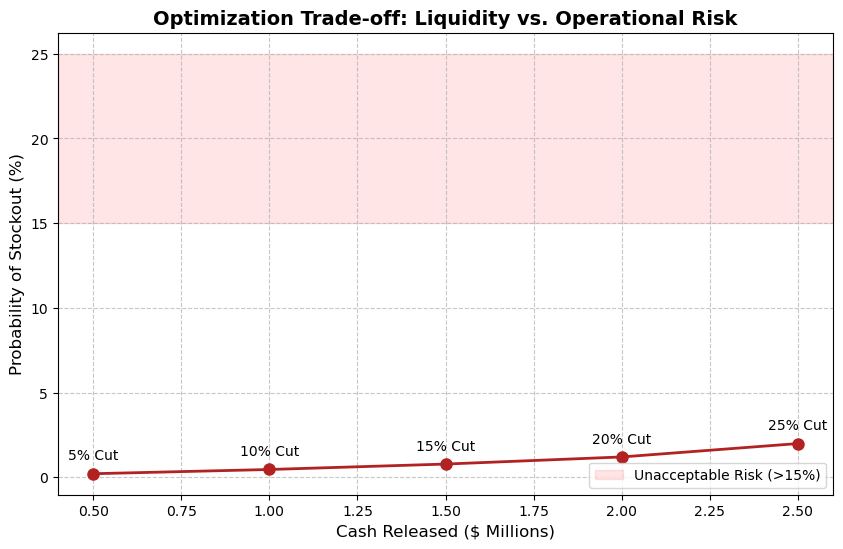

Dashboard data exported successfully.


In [5]:
!mamba install pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURATION (The "Big Business" Inputs) ---
current_inventory = 200000  # units (A large warehouse)
unit_cost = 50              # $50 per unit value
daily_demand_avg = 5000     # Big daily volume
daily_demand_std = 1500     # High volatility (Market risk)
lead_time_avg = 14          # 2 weeks shipping from China/India
lead_time_std = 5           # Port delays (Mombasa is unpredictable)
simulations = 10000         # Number of "Future Scenarios"
# --- THE SIMULATION ENGINE ---
def run_simulation(safety_stock_reduction_percentage):
    stockouts = 0
    # Reduce inventory based on the CFO's "What If" scenario
    starting_stock = current_inventory * (1 - safety_stock_reduction_percentage)
    
    for i in range(simulations):
        # 1. Randomize Demand (Normal Distribution)
        # We simulate demand over the lead time period
        actual_lead_time = max(1, np.random.normal(lead_time_avg, lead_time_std))
        total_demand_during_wait = np.random.normal(daily_demand_avg, daily_demand_std) * actual_lead_time
        
        # 2. Did we fail?
        if total_demand_during_wait > starting_stock:
            stockouts += 1
            
    risk_probability = (stockouts / simulations) * 100
    return risk_probability

# --- THE EXECUTIVE OUTPUT ---
scenarios = [0.0, 0.10, 0.20, 0.30] # Cutting stock by 0%, 10%, 20%, 30%
results = {}

print(f"--- RISK ASSESSMENT REPORT (Nairobi Ops) ---")
for cut in scenarios:
    risk = run_simulation(cut)
    savings = (current_inventory * cut) * 50 # Assuming $50 cost per unit
    results[f"Cut {int(cut*100)}%"] = f"Risk: {risk:.2f}% | Cash Released: ${savings:,.0f}"
    print(f"If we cut inventory by {int(cut*100)}%: Risk of Failure is {risk:.1f}% -> Cash Unlocked: ${savings:,.0f}")

    # --- VISUALIZATION (The "Consulting" Chart) ---
cuts = [0.05, 0.10, 0.15, 0.20, 0.25] # 5% to 25% cuts
risks = []
cash_unlocked = []

print("Running simulation scenarios...")
for cut in cuts:
    r = run_simulation(cut)
    c = (current_inventory * cut) * unit_cost
    risks.append(r)
    cash_unlocked.append(c / 1_000_000) # Convert to Millions

# Plotting the "Efficient Frontier"
plt.figure(figsize=(10, 6))
plt.plot(cash_unlocked, risks, marker='o', color='#b22222', linewidth=2, markersize=8)

# Formatting to look like a McKinsey Slide
plt.title('Optimization Trade-off: Liquidity vs. Operational Risk', fontsize=14, fontweight='bold')
plt.xlabel('Cash Released ($ Millions)', fontsize=12)
plt.ylabel('Probability of Stockout (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations (The "Insight")
for i, txt in enumerate(risks):
    label = f"{int(cuts[i]*100)}% Cut"
    plt.annotate(label, (cash_unlocked[i], risks[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Highlight the "Danger Zone"
plt.axhspan(15, 25, color='red', alpha=0.1, label='Unacceptable Risk (>15%)')
plt.legend()

plt.show()

# Export the simulation results for Tableau
results_df = pd.DataFrame({
    'Scenario_Cut_Percentage': cuts,
    'Cash_Released': cash_unlocked,
    'Stockout_Risk': risks
})
results_df.to_csv('OpVaR_Simulation_Results.csv', index=False)
print("Dashboard data exported successfully.")